# Bound Verification

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
with open("benchmarks/results/correct.pkl", 'rb') as f:
    d = pickle.load(f)

In [4]:
hist = d[('LQG_nD', 'NpeetEstimator', 5000, 40, 0.9, 'QfunctionFQI')]
hist

[({0, 1, 2, 3, 4, 5, 6, 7}, 0.0, 0.0),
 ({0, 1, 2, 4, 5, 6, 7}, 2.8379676239516546e-05, 17.95976584969519),
 ({0, 1, 2, 4, 5, 6}, 4.237160047659866e-05, 79.35314991080675),
 ({0, 1, 4, 5, 6}, 2.9296883417312128e-05, 167.32697516418727),
 ({0, 1, 4, 5}, 5.561186922119603e-05, 213.23801919937358),
 ({0, 1, 4}, 19.963624361368243, 517.6060308282014),
 ({0, 4}, 158.6850670935827, 624.2811111452903),
 ({0}, 4130.964852209006, 737.3329139573507),
 (set(), 6879.375607811597, 800.1356761473131)]

In [5]:
def print_table(hist):
    pre =   r"\begin{tabular}{@{}lcc@{}}" "\n" r"\toprule" "\n" \
            r"\multicolumn{1}{c}{Set of Selected Features} &" "\n" \
            r"$\Enorm{\qpi(\feat)-\hqpi(\feat_S)}{2}{\mu}$ &" "\n" \
            r"Bound   \\ \midrule" "\n"
    post = r"\bottomrule" "\n" "\end{tabular}"
    tab = []
    for t in hist:
        if t[0]:
            S = "$\set{" + ", ".join([f"s_{i}" for i in t[0]]) + "}$"
        else:
            S = "$\emptyset$"
        tab.append(S + " & " + f"{t[1]:10.5g}" + " & " + f"{t[2]:10.5g}" + "\\\\")
    return pre + "\n".join(tab) + post

In [6]:
print(print_table(hist))

\begin{tabular}{@{}lcc@{}}
\toprule
\multicolumn{1}{c}{Set of Selected Features} &
$\Enorm{\qpi(\feat)-\hqpi(\feat_S)}{2}{\mu}$ &
Bound   \\ \midrule
$\set{s_0, s_1, s_2, s_3, s_4, s_5, s_6, s_7}$ &          0 &          0\\
$\set{s_0, s_1, s_2, s_4, s_5, s_6, s_7}$ &  2.838e-05 &      17.96\\
$\set{s_0, s_1, s_2, s_4, s_5, s_6}$ & 4.2372e-05 &     79.353\\
$\set{s_0, s_1, s_4, s_5, s_6}$ & 2.9297e-05 &     167.33\\
$\set{s_0, s_1, s_4, s_5}$ & 5.5612e-05 &     213.24\\
$\set{s_0, s_1, s_4}$ &     19.964 &     517.61\\
$\set{s_0, s_4}$ &     158.69 &     624.28\\
$\set{s_0}$ &       4131 &     737.33\\
$\emptyset$ &     6879.4 &     800.14\\\bottomrule
\end{tabular}


In [7]:
def plot_table(hist):
    fig = plt.figure(figsize=(9,5))
    ax = plt.subplot(111)
    y = np.array(list(map(lambda t: t[1], hist)))
    x = np.arange(len(y))
    ax.step(x, y, where='mid', label="True Estimation", marker="x")
    y = np.array(list(map(lambda t: t[2], hist)))
    ax.step(x, y, where='mid', label="Bound", marker="o")
    ax.legend()
    plt.xlabel("Number of Features Removed")
    plt.ylabel("Value error")
    plt.title("Bound Verification")
    plt.show()
    return fig

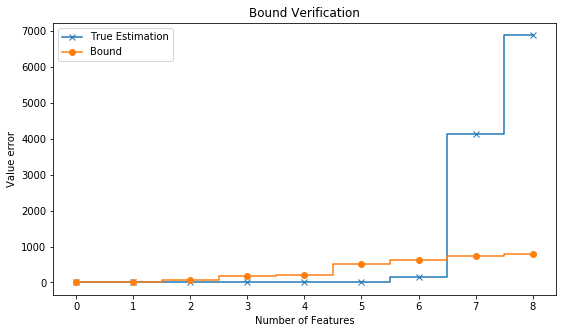

In [8]:
fig = plot_table(hist)

In [9]:
fig.savefig("images/bound-verification.png")